In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas_profiling import ProfileReport

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


1  target & 22 Features

#inference:
1. Data set is Clean, No presence of Null values.

2. The problem is all the data is Categorical.

In [ ]:
ProfileReport(df)

In [4]:
from scipy.stats import spearmanr

In [5]:
corr,pval=spearmanr(df)

D:\ANACONDA\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\ANACONDA\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [6]:
np.array(corr).shape

(23, 23)

In [7]:
corr_df=pd.DataFrame(corr,columns=df.columns,index=df.columns)

<AxesSubplot:>

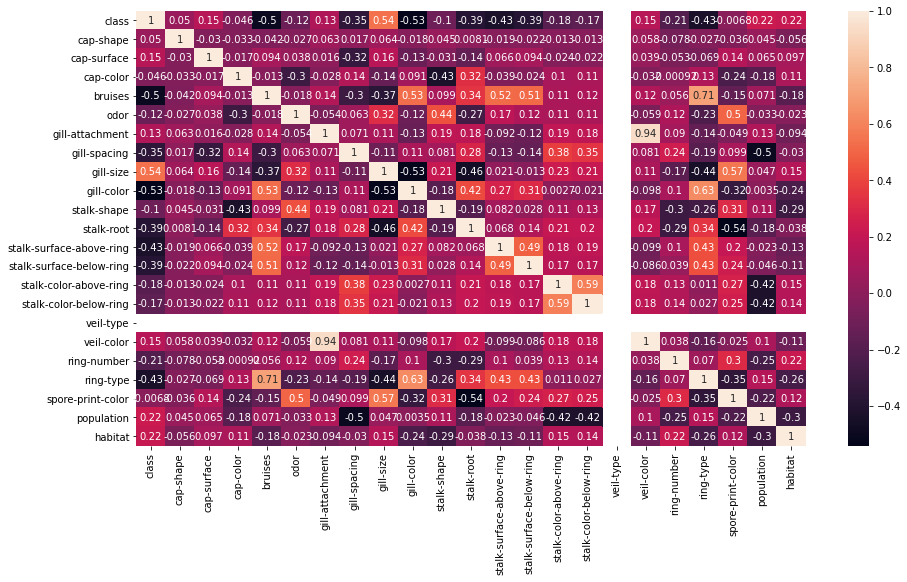

In [8]:
%matplotlib inline
plt.figure(figsize=(15,8))
sns.heatmap(corr_df,annot=True)

In [9]:
corr_df['class'].sort_values() #gill-color is the highest -ve correlated feature w.r.t to Output.

gill-color                 -0.532337
bruises                    -0.501530
ring-type                  -0.434941
stalk-surface-above-ring   -0.429896
stalk-surface-below-ring   -0.390074
stalk-root                 -0.388104
gill-spacing               -0.348387
ring-number                -0.214119
stalk-color-above-ring     -0.179639
stalk-color-below-ring     -0.167067
odor                       -0.115740
stalk-shape                -0.102019
cap-color                  -0.045984
spore-print-color          -0.006771
cap-shape                   0.049519
gill-attachment             0.129200
veil-color                  0.153403
cap-surface                 0.154762
habitat                     0.216488
population                  0.224167
gill-size                   0.540024
class                       1.000000
veil-type                        NaN
Name: class, dtype: float64

In [253]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le=LabelEncoder()
onehot=OneHotEncoder()

In [11]:
df1=df.drop('veil-type',axis=1)

In [223]:
#split the data into X & Y
 #top 5 features that have high co-relation values w.r.t target
X=df1[['gill-color','bruises','ring-type','stalk-surface-above-ring','stalk-surface-below-ring','stalk-root','gill-size','population','gill-spacing','ring-number','habitat']]
Y=df1['class']

In [224]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [258]:
df_enc=pd.DataFrame()
for i in X.columns:
    #label hot encoder 
    print('Column: ',i)
    le.fit(X[i].values.reshape(-1,1))
    temp=le.fit_transform(X[i].values.reshape(-1,1))
    print('*******TRANSFORMED SUCCESSFULLY******')
    #making a dense matrix as a DF
    df_t=pd.DataFrame(temp,columns=[i]) 
    print(type(temp))
    print(temp)
    df_enc=pd.concat([df_enc,df_t],axis=1)

Column:  gill-color
*******TRANSFORMED SUCCESSFULLY******
<class 'numpy.ndarray'>
[ 4  4  5 ...  5  0 11]
Column:  bruises
*******TRANSFORMED SUCCESSFULLY******
<class 'numpy.ndarray'>
[1 1 1 ... 0 0 0]
Column:  ring-type
*******TRANSFORMED SUCCESSFULLY******
<class 'numpy.ndarray'>
[4 4 4 ... 4 0 4]
Column:  stalk-surface-above-ring
*******TRANSFORMED SUCCESSFULLY******
<class 'numpy.ndarray'>
[2 2 2 ... 2 2 2]
Column:  stalk-surface-below-ring
*******TRANSFORMED SUCCESSFULLY******
<class 'numpy.ndarray'>
[2 2 2 ... 2 1 2]
Column:  stalk-root
*******TRANSFORMED SUCCESSFULLY******
<class 'numpy.ndarray'>
[3 2 2 ... 0 0 0]
Column:  gill-size
*******TRANSFORMED SUCCESSFULLY******
<class 'numpy.ndarray'>
[1 0 0 ... 0 1 0]
Column:  population
*******TRANSFORMED SUCCESSFULLY******
<class 'numpy.ndarray'>
[3 2 2 ... 1 4 1]
Column:  gill-spacing
*******TRANSFORMED SUCCESSFULLY******
<class 'numpy.ndarray'>
[0 0 0 ... 0 0 0]
Column:  ring-number
*******TRANSFORMED SUCCESSFULLY******
<class 'nu

In [225]:
df_enc=pd.DataFrame()
for i in X.columns:
    #one hot encoder 
    print('Column: ',i)
    onehot.fit(X[i].values.reshape(-1,1))
    temp=onehot.fit_transform(X[i].values.reshape(-1,1))
    #converting the sparse matrix to dense
    temp=temp.todense() 
    print('*******TRANSFORMED SUCCESSFULLY******')
    #making a dense matrix as a DF
    df_t=pd.DataFrame(temp,columns=onehot.get_feature_names([i])) 
    #dropping the last column to avoid the dummy variable trap
    df_t=df_t.iloc[:,:-1] 
    #dropping the last column to avoid the dummy variable trap
    df_enc=pd.concat([df_enc,df_t],axis=1) 

Column:  gill-color
*******TRANSFORMED SUCCESSFULLY******
Column:  bruises
*******TRANSFORMED SUCCESSFULLY******
Column:  ring-type
*******TRANSFORMED SUCCESSFULLY******
Column:  stalk-surface-above-ring
*******TRANSFORMED SUCCESSFULLY******
Column:  stalk-surface-below-ring
*******TRANSFORMED SUCCESSFULLY******
Column:  stalk-root
*******TRANSFORMED SUCCESSFULLY******
Column:  gill-size
*******TRANSFORMED SUCCESSFULLY******
Column:  population
*******TRANSFORMED SUCCESSFULLY******
Column:  gill-spacing
*******TRANSFORMED SUCCESSFULLY******
Column:  ring-number
*******TRANSFORMED SUCCESSFULLY******
Column:  habitat
*******TRANSFORMED SUCCESSFULLY******


In [226]:
df1['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [259]:
df_enc.head()

,gill-color,bruises,ring-type,stalk-surface-above-ring,stalk-surface-below-ring,stalk-root,gill-size,population,gill-spacing,ring-number,habitat
0,4,1,4,2,2,3,1,3,0,1,5
1,4,1,4,2,2,2,0,2,0,1,1
2,5,1,4,2,2,2,0,2,0,1,3
3,5,1,4,2,2,3,1,3,0,1,5
4,4,0,0,2,2,3,0,0,1,1,1


In [260]:
#label-encode the target
from sklearn.preprocessing import LabelEncoder
labenc=LabelEncoder()

In [261]:
labenc.fit(Y)
y=labenc.fit_transform(Y)

In [262]:
sum(y)/len(y)

0.48202855736090594

Out of 100, 52% of the data is having edible & the 48% is having poisonous

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
X_train,X_test,Y_train,Y_test=train_test_split(df_enc,y,train_size=.8,random_state=42)
X_train,X_cv,Y_train,Y_cv=train_test_split(X_train,Y_train,train_size=.7,random_state=42)

In [265]:
len(Y_train)

4549

In [266]:
len(Y_cv)

1950

In [267]:
len(Y_test)

1625

In [270]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=10,max_depth=9)

In [271]:
dec.fit(X_train,Y_train)
print('Train score: ',dec.score(X_train,Y_train))

print('CV Score: ',dec.score(X_cv,Y_cv))
print('Test score: ',dec.score(X_test,Y_test))

Train score:  1.0
CV Score:  1.0
Test score:  1.0


In [272]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [273]:
print('DEC Confusion Matrix---Train Score')
print('**************************')
print(confusion_matrix(Y_train,dec.predict(X_train)))
cls=classification_report(Y_train,dec.predict(X_train),target_names=['edible','poisonous'])
print(cls)

DEC Confusion Matrix---Train Score
**************************
[[2361    0]
 [   0 2188]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      2361
   poisonous       1.00      1.00      1.00      2188

    accuracy                           1.00      4549
   macro avg       1.00      1.00      1.00      4549
weighted avg       1.00      1.00      1.00      4549



In [274]:
print('DEC Confusion Matrix')
print('**************************')
print(confusion_matrix(Y_test,dec.predict(X_test)))
cls=classification_report(Y_test,dec.predict(X_test),target_names=['edible','poisonous'])
print(cls)

DEC Confusion Matrix
**************************
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [275]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(df_enc,y,train_size=.8,random_state=42)

from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=10,max_depth=9)

dec.fit(X_train,Y_train)
print('Train score: ',dec.score(X_train,Y_train))
print('Test score: ',dec.score(X_test,Y_test))

from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

print('DEC Confusion Matrix')
print('**************************')
print(confusion_matrix(Y_test,dec.predict(X_test)))
cls=classification_report(Y_test,dec.predict(X_test),target_names=['edible','poisonous'])
print(cls)


Train score:  1.0
Test score:  1.0
DEC Confusion Matrix
**************************
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



#data is quite balanced